In [47]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image   
from scipy import ndimage   #goruntu isleme yetenekleri ekler.
import scipy
import skimage
#import skimage   #goruntu isleme yetenekleri ekler.
%matplotlib inline

In [48]:
#datayı yükleme fonksiyonu
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    # training seti yuklendi...
    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    # test seti yuklendi...
    classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    # setlerini sutun degerlerini garanti olması icin guncelledik...

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [101]:
train_set_x, train_set_y, test_set_x, test_set_y, classes = load_dataset()
num_px = train_set_x.shape[1]
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]

# print(train_set_x.shape)
# print(train_set_y.shape)
# print(test_set_x.shape)
# print(test_set_y.shape)
# print(train_set_x[1][1].shape)
# print(len(train_set_x[1][1][1]))
# print(train_set_x[1][1][1][1]) 
# #1.indisteki resmin 1.indisteki 64 tane 3 katmanlı piksellerin 1.indisindeki 3 katmanlı pikselin 1.indisindeki rgb değeri :))
# print(train_set_y[0][13]) #209 resmin sonuçları

print("Eğitim örneği adedi : " + str(m_train))
print("Test örneği adedi : " + str(m_test))
print("Her görüntünün yükseklik ve genişlik değeri : " + str(num_px))
print("Her görüntünün üç boyutlu gösterimi : (" + str(num_px) + "," + str(num_px) + ",3)")
print ("train_set_x shape : " + str(train_set_x.shape))
print ("train_set_y shape : " + str(train_set_y.shape))
print ("test_set_x shape : " + str(test_set_x.shape))
print ("test_set_y shape : " + str(test_set_y.shape))


Eğitim örneği adedi : 209
Test örneği adedi : 50
Her görüntünün yükseklik ve genişlik değeri : 64
Her görüntünün üç boyutlu gösterimi : (64,64,3)
train_set_x shape : (209, 64, 64, 3)
train_set_y shape : (1, 209)
test_set_x shape : (50, 64, 64, 3)
test_set_y shape : (1, 50)


Bu bir kedi degildir.


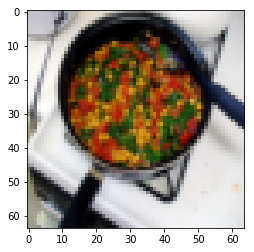

In [88]:
index = 31
plt.imshow(train_set_x[index])
print("Bu bir ",end = "") 
print("kedidir" if train_set_y[:,index] == 1  else "kedi degildir.")

In [89]:
print(train_set_x.reshape(train_set_x.shape[0], -1)) #bütün piksel değerlerini yanyana dizerek bir resmi oluşturduk.
train_temp = train_set_x.reshape(train_set_x.shape[0], -1).T #her resmin datasını sütunlarda tutulacak şekilde çevirdik.
print(train_temp.shape)
print("\n\n")
print(test_set_x.reshape(test_set_x.shape[0], -1)) #bütün piksel değerlerini yanyana dizerek bir resmi oluşturduk.
test_temp = test_set_x.reshape(test_set_x.shape[0], -1).T #her resmin datasını sütunlarda tutulacak şekilde çevirdik.
print(test_temp.shape)

[[ 17  31  56 ...   0   0   0]
 [196 192 190 ...  82  80  81]
 [ 82  71  68 ... 138 141 142]
 ...
 [143 155 165 ...  85 107 149]
 [ 22  24  23 ...   4   5   0]
 [  8  28  53 ...   0   0   0]]
(12288, 209)



[[158 104  83 ... 173 128 110]
 [115 110 111 ... 171 176 186]
 [255 253 254 ... 133 101 121]
 ...
 [ 41  47  84 ... 183 141 116]
 [ 18  18  16 ... 144 137 108]
 [133 163  75 ...   5  22   5]]
(12288, 50)


In [90]:
train_set_x = train_temp/255.
print(train_set_x)
print("\n\n")
test_set_x = test_temp/255.
print(test_set_x)

[[0.06666667 0.76862745 0.32156863 ... 0.56078431 0.08627451 0.03137255]
 [0.12156863 0.75294118 0.27843137 ... 0.60784314 0.09411765 0.10980392]
 [0.21960784 0.74509804 0.26666667 ... 0.64705882 0.09019608 0.20784314]
 ...
 [0.         0.32156863 0.54117647 ... 0.33333333 0.01568627 0.        ]
 [0.         0.31372549 0.55294118 ... 0.41960784 0.01960784 0.        ]
 [0.         0.31764706 0.55686275 ... 0.58431373 0.         0.        ]]



[[0.61960784 0.45098039 1.         ... 0.16078431 0.07058824 0.52156863]
 [0.40784314 0.43137255 0.99215686 ... 0.18431373 0.07058824 0.63921569]
 [0.3254902  0.43529412 0.99607843 ... 0.32941176 0.0627451  0.29411765]
 ...
 [0.67843137 0.67058824 0.52156863 ... 0.71764706 0.56470588 0.01960784]
 [0.50196078 0.69019608 0.39607843 ... 0.55294118 0.5372549  0.08627451]
 [0.43137255 0.72941176 0.4745098  ... 0.45490196 0.42352941 0.01960784]]


In [91]:
def start_with_zeros(dim):
    w = np.zeros(shape = (dim,1))
    b = 0
    assert(w.shape==(dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [92]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [93]:
def forward_propagation(w,b,X,Y):
    
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X) + b)
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    dz = A - Y
    dw = (1/m) * np.dot(X,dz.T)
    db = (1/m) * np.sum(dz)
    
    turev = {
        "dw" : dw,
        "db" : db
    }
    
    return turev,cost
    

In [94]:
def back_propagation(w,b,X,Y,learning_rate,iteration,print_cost):
    
    costs = []
    
    for i in range(iteration):
        turev,cost = forward_propagation(w,b,X,Y)
        
        w = w - (learning_rate * turev["dw"])
        b = b - (learning_rate * turev["db"])
        
        if(i%100 == 0):
            costs.append(cost)
        
        if(i%100 == 0 and  print_cost == True):
            print("{}. iterasyonda cost fonksiyonunun değeri : {}".format(i,cost))
    
    parametreler = {
        "w" : w,
        "b" : b
    }
    turev = {
        "dw" : turev["dw"],
        "db" : turev["db"]
    }
    
    return parametreler,turev,costs

In [95]:
def tahmin(w,b,X):
    
    Y_tahmin = np.zeros(shape = (1,X.shape[1]))
    
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        if(A[0,i] > 0.5):
            Y_tahmin[0,i] = 1
    
    assert(Y_tahmin.shape == (1, X.shape[1]))
    return Y_tahmin

In [96]:
def logisticRegressionModel(X_train, Y_train, X_test, Y_test, iteration = 100, learning_rate = 0.01, print_cost = False):
    
    w, b = start_with_zeros(X_train.shape[0])
    parametreler, turev, costs = back_propagation(w,b,X_train,Y_train,learning_rate,iteration,print_cost)
    
    Y_prediction_train = tahmin(parametreler["w"], parametreler["b"], X_train)
    Y_prediction_test = tahmin(parametreler["w"], parametreler["b"], X_test)
    
    
    print("Train'in doğruluğu : {} %".format(np.abs(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100)))
    print("Test'in doğruluğu : {} %".format(np.abs(100 - np.mean(np.abs(Y_prediction_test - Y_test))*100)))
    
    d = {
        "costs" : costs,
        "Y_prediction_train" : Y_prediction_train,
        "Y_prediction_test" : Y_prediction_test,
        "w" : parametreler["w"],
        "b" : parametreler["b"],
        "learning_rate" : learning_rate,
        "iteration" : iteration
    }
    
    return d

In [97]:
d = logisticRegressionModel(train_set_x,train_set_y,test_set_x,test_set_y,iteration=2000, learning_rate=0.005,print_cost = True)

0. iterasyonda cost fonksiyonunun değeri : 0.6931471805599453
100. iterasyonda cost fonksiyonunun değeri : 0.5845083636993086
200. iterasyonda cost fonksiyonunun değeri : 0.46694904094655476
300. iterasyonda cost fonksiyonunun değeri : 0.37600686694802077
400. iterasyonda cost fonksiyonunun değeri : 0.3314632893282513
500. iterasyonda cost fonksiyonunun değeri : 0.30327306747438293
600. iterasyonda cost fonksiyonunun değeri : 0.2798795865826048
700. iterasyonda cost fonksiyonunun değeri : 0.26004213692587574
800. iterasyonda cost fonksiyonunun değeri : 0.24294068467796623
900. iterasyonda cost fonksiyonunun değeri : 0.22800422256726066
1000. iterasyonda cost fonksiyonunun değeri : 0.21481951378449635
1100. iterasyonda cost fonksiyonunun değeri : 0.20307819060644985
1200. iterasyonda cost fonksiyonunun değeri : 0.1925442771670686
1300. iterasyonda cost fonksiyonunun değeri : 0.18303333796883503
1400. iterasyonda cost fonksiyonunun değeri : 0.17439859438448876
1500. iterasyonda cost fonk

In [98]:
index = 5
plt.imshow(train_set_x[:,index].reshape(num_px,num_px,3))

NameError: name 'num_px' is not defined

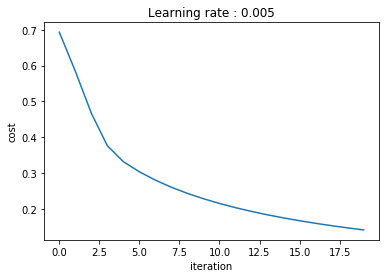

In [80]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.ylabel("cost")
plt.xlabel("iteration")
plt.title("Learning rate : " + str(d["learning_rate"]))
plt.show()

Ogrenme Katsayısı : 0.003
Train'in doğruluğu : 97.12918660287082 %
Test'in doğruluğu : 70.0 %

-------------------------------------------------------

Ogrenme Katsayısı : 0.005
Train'in doğruluğu : 99.04306220095694 %
Test'in doğruluğu : 70.0 %

-------------------------------------------------------

Ogrenme Katsayısı : 0.001
Train'in doğruluğu : 91.38755980861244 %
Test'in doğruluğu : 68.0 %

-------------------------------------------------------

Ogrenme Katsayısı : 0.01
Train'in doğruluğu : 99.52153110047847 %
Test'in doğruluğu : 70.0 %

-------------------------------------------------------



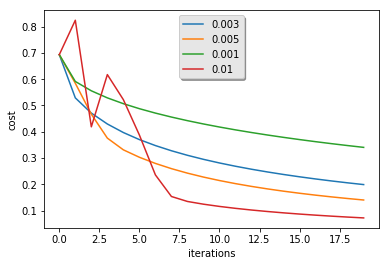

In [85]:
learning_rates = [0.003,0.005,0.001,0.01]
models = {}

for i in learning_rates:
    print("Ogrenme Katsayısı : " + str(i))
    models[str(i)] = logisticRegressionModel(train_set_x, train_set_y, test_set_x, test_set_y, iteration = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [102]:
#Kendi Resmimizi kontrol etme...
my_image="IMG_4531.JPG"


fname =my_image
image = np.array(plt.imread(fname))
my_image = skimage.transform.resize(image, (num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")


C:\Users\HUSEYIN\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\HUSEYIN\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


NameError: name 'predict' is not defined